In [1]:
import torch
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
a = torch.tensor(3.0 , requires_grad=True)
b = torch.tensor(4.0 , requires_grad=True)
x = a*b

# PyTorch calculating gradients
x.backward()
a.grad , b.grad

(tensor(4.), tensor(3.))

In [3]:
# fake data
SAMPLES = 500
x = np.arange(1 , SAMPLES)
random.shuffle(x)

y = 0.3*x + 4

x[:5] , y[:5]

(array([154,  84, 163, 477, 476]), array([ 50.2,  29.2,  52.9, 147.1, 146.8]))

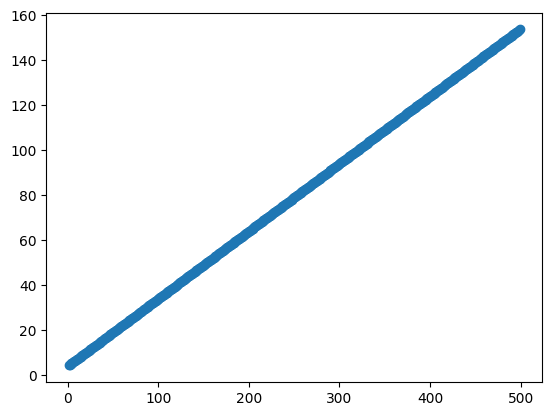

In [4]:
# data visualization
plt.scatter(x , y)

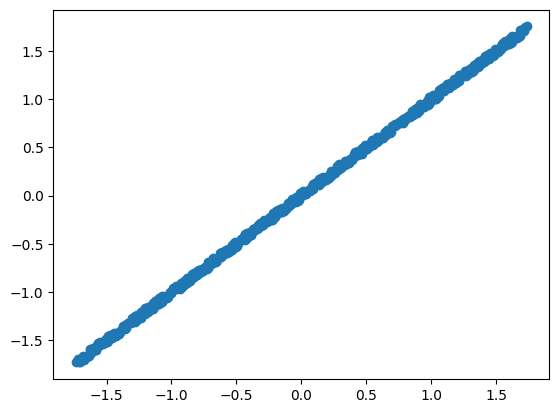

In [5]:
# adding more randomness to data
x += np.random.randint(0 , 3 , size=len(x))
y += np.random.randint(0 , 3 , size=len(y))

x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

plt.scatter(x , y)

In [6]:
split = int(SAMPLES * 0.8)

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

(array([[-1.67349152, -0.0070548 , -1.11801261, -0.6180816 , -0.0070548 ]]), array([[-1.68846576,  0.00995125, -1.13312505, -0.63331841,  0.02383476]]))


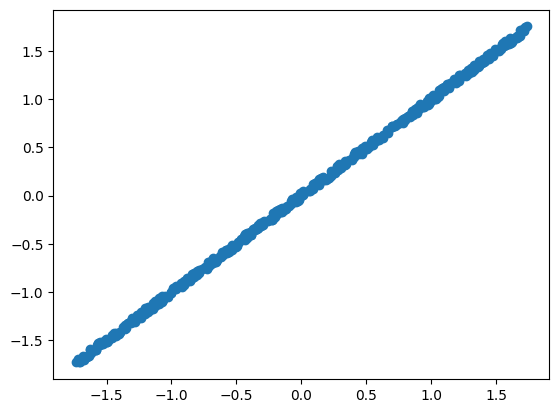

In [7]:
def get_batch(train=True):
    if train:
        idx = np.random.randint(0 , len(x_train)-1 , size = 5) # SAMPLES-1 because .randint is inclusive of end
        return np.expand_dims(x_train[idx] , axis=0) , np.expand_dims(y_train[idx] , axis=0)
    
    idx = np.random.randint(0 , len(x_test)-1 , size = 5)
    return np.expand_dims(x_test[idx] , axis=0) , np.expand_dims(y_test[idx] , axis=0)

print(get_batch())

plt.scatter(x_train , y_train)

In [12]:
# defining model
w = np.random.rand(1,1)
b = np.random.rand(1,1)
print("Weight: ", w , " | Bias: ", b)

x_i = [x_train[0]]
print("Y_pred: " , x_i@w + b , "Y_true: " , [y_train[0]])

Weight:  [[0.69928853]]  | Bias:  [[0.09882186]]
Y_pred:  [[-0.36252852]] Y_true:  [-0.688852481808087]


In [14]:
# defining loss function
def MSE(y_true , y_pred):
    return np.mean((y_pred - y_true)**2)

x , y = get_batch()
y_pred = w@x + b
print(x.shape , w.shape, y_pred.shape)
print("MSE: " , MSE(y , y_pred))

(1, 5) (1, 1) (1, 5)
MSE:  0.056095749033905226


In [15]:
EPOCHS = 500
alpha = 0.005

for epoch in range(EPOCHS):
    # forward pass
    x , y = get_batch()
    y_pred = w@x + b

    # compute MSE loss
    loss = MSE(y , y_pred)

    # compute gradients
    dw = 2 * np.mean((y_pred - y)*x) 
    db = 2 * np.mean(y_pred - y)

    # update parameters
    w -= alpha * dw
    b -= alpha * db

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w[0][0]:.4f}, b = {b[0][0]:.4f}")
    
print(f"\nFinal Model: y = {w[0][0]:.4f} * x + {b[0][0]:.4f}")

Epoch 0: Loss = 0.0362, w = 0.7007, b = 0.0997
Epoch 50: Loss = 0.0392, w = 0.8239, b = 0.0618
Epoch 100: Loss = 0.0122, w = 0.9014, b = 0.0368
Epoch 150: Loss = 0.0024, w = 0.9405, b = 0.0216
Epoch 200: Loss = 0.0009, w = 0.9665, b = 0.0126
Epoch 250: Loss = 0.0005, w = 0.9802, b = 0.0078
Epoch 300: Loss = 0.0007, w = 0.9886, b = 0.0050
Epoch 350: Loss = 0.0004, w = 0.9932, b = 0.0032
Epoch 400: Loss = 0.0005, w = 0.9954, b = 0.0010
Epoch 450: Loss = 0.0004, w = 0.9967, b = 0.0011

Final Model: y = 0.9983 * x + 0.0007


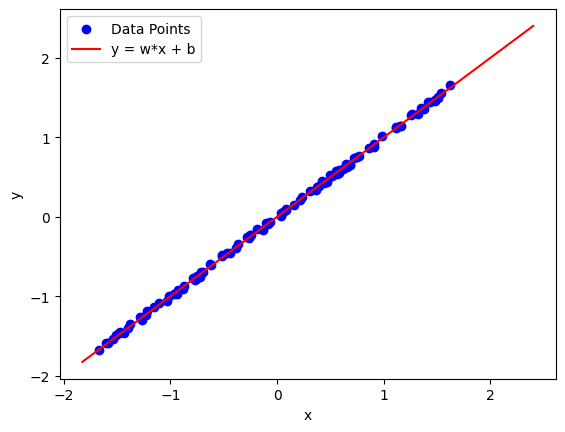

In [17]:
# plotting results

plt.scatter(x_test , y_test , color='blue' , label='Data Points')
x_line = np.linspace(x.min()-1 , x.max()+1 , 200)
y_line = w[0][0]*x_line + b[0][0]

plt.plot(x_line , y_line , color='red' , label='y = w*x + b')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()
